In [2]:
import skimage.io
import skimage.transform
import time
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import itertools

from scipy import linalg
from sklearn import mixture
from sklearn.cluster import DBSCAN,MeanShift, estimate_bandwidth

In [3]:
path = "./test_images/character1.png"
img = skimage.io.imread(path)

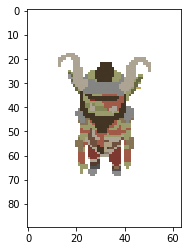

In [4]:
imgplot = plt.imshow(img,interpolation="nearest")


In [5]:
data = img.reshape(img.shape[0]*img.shape[1],img.shape[2])
print(data.shape)
data = data[data[:,3] != 0]
print(data.shape)
data = data[:,0:3]
print(data.shape)

(5760, 4)
(999, 4)
(999, 3)


In [6]:
bandwidth = estimate_bandwidth(data, quantile=0.14, n_samples=len(data))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(data)
palette = ms.cluster_centers_

In [13]:
from scipy.spatial.distance import cdist


distances = cdist(data, palette)
indexes = np.argmin(distances,axis=1)
out_img = palette[indexes]
plt.imshow(out_img.reshape(10,,3))

SyntaxError: invalid syntax (<ipython-input-13-90c929230b4a>, line 7)

16